In [73]:
import spacy
from collections import Counter
import pandas as pd
import numpy as np
%matplotlib inline

# Introduction to SpaCy

SpaCy is a natural language processing library, similar to the NLTK in some respects, but with many notable differences. 
 - Where the NLTK is meant for teaching and learning natural language processing, SpaCy is designed for industrial applications (i.e. designed for speed and accuracy, not necessarily ease-of-use). 
 - Instead of performing each function separately (`word_tokenize`, `pos_tag`, `lemmatize`), SpaCy does everything all at once. This has advantages and disadvantages. For example, processing with SpaCy takes a long time. But once a text is processed, no further processing is necessary—it just becomes a matter of accessing the data that's already there. 
 - Because SpaCy stores a *lot* of data about each text, this can easily lead to memory overflow errors. An easy way around this is to break the text up into individual parts, and to use functions wherever possible, to limit the amount of data stored in memory. It helps if you have a computer with a lot of RAM. You can also randomly sample chunks of text (like 1000-word chunks) at a time, and then take the average of all your random trials at the end. 
 - While the NLTK's natural language processing is deterministic (built on human understanding of how language works), it's not quite as accurate as SpaCy's probabilistic (built on machine understanding of language) approach. 
 
At the moment, SpaCy is the fastest, and almost the most accurate parser available. 

First, load your language model, and store it as the variable `nlp`, which can then be run as a function: 
   

In [2]:
nlp = spacy.load('en_core_web_lg')

Now let's get a text to play around with. We'll use the first narrative from _The Moonstone_. 

In [3]:
moonstone = open('../moonstone.md').read()

In [4]:
moonstoneParts = moonstone.split('%%%%%')

In [5]:
bet = moonstoneParts[1]

Process it using SpaCy: 

In [6]:
moonstoneDoc = nlp(bet)

### Exploring our SpaCy Doc

Now we can start to explore what we can do with the resulting Doc object: 

In [7]:
type(moonstoneDoc)

spacy.tokens.doc.Doc

Verify that SpaCy has successfully parsed it: 

In [8]:
moonstoneDoc.is_parsed

True

Here are some things that we can do with this object: 

In [45]:
[method for method in dir(moonstoneDoc) if not method.startswith('_')]

['cats',
 'char_span',
 'count_by',
 'doc',
 'ents',
 'extend_tensor',
 'from_array',
 'from_bytes',
 'from_disk',
 'get_extension',
 'get_lca_matrix',
 'has_extension',
 'has_vector',
 'is_parsed',
 'is_tagged',
 'mem',
 'merge',
 'noun_chunks',
 'noun_chunks_iterator',
 'print_tree',
 'sentiment',
 'sents',
 'set_extension',
 'similarity',
 'tensor',
 'text',
 'text_with_ws',
 'to_array',
 'to_bytes',
 'to_disk',
 'user_data',
 'user_hooks',
 'user_span_hooks',
 'user_token_hooks',
 'vector',
 'vector_norm',
 'vocab']

We can also get the length (in tokens) of the text: 

In [46]:
len(moonstoneDoc)

103519

SpaCy allows us to iterate over the text's words, as if the Doc were a list of tokens: 

In [47]:
for word in moonstoneDoc[40:50]:
    print(word)

late
,
the
Folly
of
beginning
a
Work
before
we


We can get a single word, too, so that we can do things with that individual word (token): 

In [48]:
written = moonstoneDoc[30]
written

written

### Exploring SpaCy Words

SpaCy words are *objects*, rather than strings, and so they contain a lot of information that can be accessed via their many methods. Here are a few things you can do with them: 

In [49]:
[method for method in dir(written) if not method.startswith('_')]

['ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_type',
 'ent_type_',
 'get_extension',
 'has_extension',
 'has_vector',
 'head',
 'i',
 'idx',
 'is_alpha',
 'is_ancestor',
 'is_ascii',
 'is_bracket',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_sent_start',
 'is_space',
 'is_stop',
 'is_title',
 'is_upper',
 'lang',
 'lang_',
 'left_edge',
 'lefts',
 'lemma',
 'lemma_',
 'lex_id',
 'like_email',
 'like_num',
 'like_url',
 'lower',
 'lower_',
 'n_lefts',
 'n_rights',
 'nbor',
 'norm',
 'norm_',
 'orth',
 'orth_',
 'pos',
 'pos_',
 'prefix',
 'prefix_',
 'prob',
 'rank',
 'right_edge',
 'rights',
 'sent_start',
 'sentiment',
 'set_extension',
 'shape',
 'shape_',
 'similarity',
 'string',
 'subtree',
 'suffix',
 'suffix_',
 'tag',
 'tag_',
 'text',
 'text_with_ws',
 'vector',
 'vector_norm',
 'vocab',
 'whitespace_']

You can get the word's POS (as in the NLTK's `pos_tag()` function), like this: 

In [12]:
written.tag_

'VBN'

Or a less specific tag (`VERB`, `NOUN`, `PUNCT`, etc.), like this: 

In [50]:
written.pos_

'VERB'

(`.tag` and `.pos`, without the underscores, are numeric representations of these. You can use those if you don't care about human readability, and want your code to be a little faster.)

You can also get the lemma for the word, which is its "dictionary form": 

In [13]:
written.lemma_

'write'

The `.i` property contains the index of the token. For instance, this "written" is the 30th token: 

In [16]:
written.i

30

With punctuation, like this comma, you can see how the `.tag` and the `.pos` properties differ: 

In [51]:
moonstoneDoc[41].tag_

','

In [52]:
moonstoneDoc[41].pos_

'PUNCT'

One caveat: the word *object* is distinct from the word's string, so to count these, or otherwise treat them as strings, we first have to extract their text: 

In [66]:
type(written)

spacy.tokens.token.Token

In [67]:
written.text

'written'

And sometimes that text contains whitespace, so we might also have to run `written.text.strip()`, which takes out leading and trailing whitespace.

### Named Entity Recognition

Named entity recognition, or NER, is a subfield of natual language processing that deals with the automatic identification of people, places, things, and other related "names." This sometimes includes numbers, dates, and other things. You can tell whether a word is a named entity, and if so, what type of entity it is, like this: 

In [17]:
written.ent_type_

''

Explore the types of entities in the first 500 words of _The Moonstone_: 

In [62]:
for word in moonstoneDoc[50:150]: 
    if len(word.text.strip()) > 0 and len(word.ent_type_) > 0: 
        print(word.text.strip(), ':', word.ent_type_)

Only : DATE
yesterday : DATE
ROBINSON : ORG
CRUSOE : PRODUCT
this : TIME
morning : TIME
May : DATE
twenty : DATE
- : DATE
first : DATE
Eighteen : CARDINAL
hundred : CARDINAL
and : CARDINAL
fifty : CARDINAL
Franklin : PERSON
Blake : PERSON
Betteredge : PERSON
Franklin : PERSON


As you can see, it gets somethings wrong (it thinks "Robinson Crusoe" is an organization and a product, respectively), but it gets a lot right. We can extract places like this: 

In [63]:
for word in moonstoneDoc[:2000]: 
    if len(word.ent_type_) > 0: 
        if word.ent_type_ == 'GPE': 
            print(word)

Yorkshire
India


Yorkshire


And times like this: 

In [65]:
for word in moonstoneDoc[:2000]: 
    if len(word.ent_type_) > 0: 
        if word.ent_type_ == 'TIME': 
            print(word)

this


morning
twelve
hours
Two
hours
the
morning
the
evening


Alternatively, we can write this as a list comprehension: 

In [68]:
times = [word.text for word in moonstoneDoc if word.ent_type_ == 'TIME']

In [69]:
type(times)

list

We can count our list of times, put this into a Pandas Series, and plot them, to try to show what kinds of times occur most often in Betteredge's narrative: 

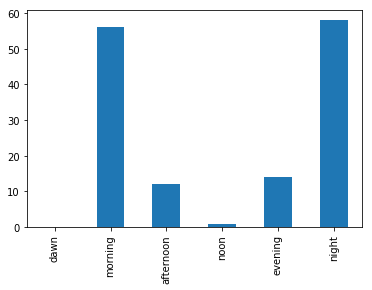

In [71]:
pd.Series(Counter(times))[['dawn', 'morning', 'afternoon', 'noon',
                           'evening', 'night']].plot(kind='bar')

We can also do this with "o'clock" times: 

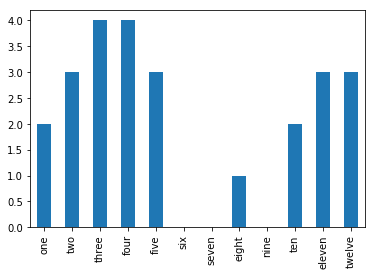

In [72]:
pd.Series(Counter(times))[['one', 'two', 'three', 'four', 'five', 'six',
                           'seven', 'eight', 'nine', 'ten', 'eleven',
                           'twelve']].plot(kind='bar')

And we can also see how frequently times and dates occur in narrative time. We could either do this the way we've learned, by turning it into a binary representation, and splitting it: 

In [ ]:
binary = np.array([1 if word.ent_type_ == 'TIME' else 0 for word in moonstoneDoc])
split = np.array_split(binary, 20)
pd.Series(split).sum().plot()

Or we could do this a slightly different way: 

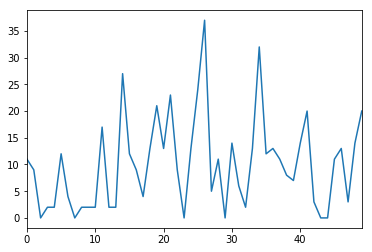

In [159]:
times = pd.Series(np.histogram([word.i for word in moonstoneDoc if word.ent_type_ == 'TIME'], bins=50)[0])
times.plot()

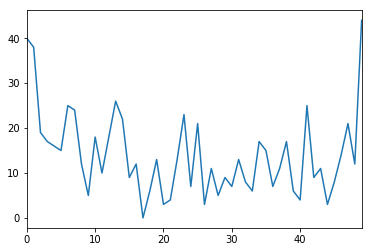

In [160]:
dates = pd.Series(np.histogram([word.i for word in moonstoneDoc if word.ent_type_ == 'DATE'], bins=50)[0])
dates.plot()

These seem to happen with an interesting regularity. Do they correlate with chapter headings? 

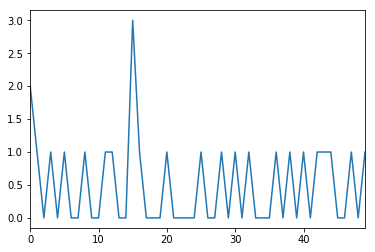

In [161]:
chaps = pd.Series(np.histogram([word.i for word in moonstoneDoc if word.text.strip().lower() == 'chapter'], bins=50)[0])
chaps.plot()

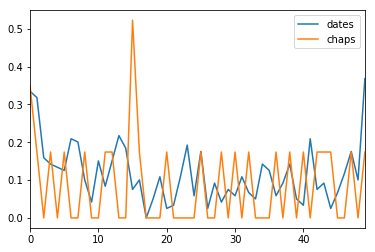

In [162]:
datesNormed = dates/np.linalg.norm(dates) # Normalize, kind of
chapsNormed = chaps/np.linalg.norm(chaps)
timesNormed = times/np.linalg.norm(times)
df = pd.DataFrame([datesNormed, chapsNormed], index=['dates', 'chaps']).T
df.plot()